# K-NEAREST NEIGHBOUR

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#######
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
####### main library for today
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('/content/drive/My Drive/data/credit_data.csv')
data.head(10)

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [3]:
data.default.sum()

283

In [4]:
print(data.isna().sum(axis=0))

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


In [5]:
features=data[['income','age','loan']]
target=data[['default']]

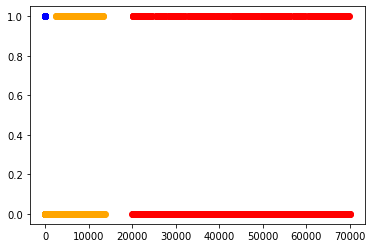

In [6]:
plt.scatter(data.income,data.default,color='red') # can be written as plt.scatter(data['income'],data['default'])
plt.scatter(data.age,data.default,color='blue')
plt.scatter(data.loan,data.default,color='orange')
plt.show()


In [7]:
features

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [8]:
features= preprocessing.MinMaxScaler().fit_transform(features)
features

array([[0.9231759 , 0.89209175, 0.58883739],
       [0.28812165, 0.65470788, 0.47682695],
       [0.74633429, 0.9811888 , 0.58262011],
       ...,
       [0.48612202, 0.21695807, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.82970913, 0.53597028]])

In [9]:
features_train,features_test,target_train,target_test=train_test_split(features,target)

In [15]:
model=KNeighborsClassifier(n_neighbors=16)
fitmodel=model.fit(features_train,target_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [11]:
predictions= fitmodel.predict(features_test)

In [24]:
cross_val_scores = []

for k in range(1,10):
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,features,target,cv=10,scoring='accuracy')
  cross_val_scores.append(scores.mean())

print('optimal k with cross validation is: \t',np.argmax(cross_val_scores))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

optimal k with cross validation is: 	 8


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [16]:
print(confusion_matrix(target_test,predictions) )
print(accuracy_score(target_test,predictions))

[[426   1]
 [ 14  59]]
0.97


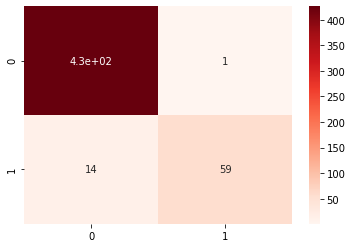

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Reds')
